Q1:  What is the difference between K-Means and Hierarchical Clustering?

Ans : K-Means Clustering: This method requires you to specify the number of clusters (k) beforehand. It works by partitioning data points into k clusters based on their proximity to the cluster centers (centroids). It is generally more computationally efficient for large datasets.
Hierarchical Clustering: This method does not require specifying the number of clusters in advance. It builds a hierarchy of clusters, either by merging smaller clusters into larger ones (agglomerative) or by splitting larger clusters into smaller ones (divisive). You can then choose the number of clusters by cutting the dendrogram (a tree-like diagram) at a certain level. Hierarchical clustering can be more computationally intensive than K-Means.

Q2:  Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

Ans: The Silhouette Score is a metric used to evaluate the quality of clusters. It measures how similar an object is to its own cluster compared to other clusters. A high Silhouette Score indicates that objects are well-clustered and distinct from other clusters.  A high Silhouette Score indicates that objects are well-clustered and distinct from other clusters. I will add this explanation to the markdown cell.

Q3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

Ans:  The core parameters of DBSCAN are:

eps (epsilon): This is the maximum distance between two samples for one to be considered as in the neighborhood of the other. A smaller eps will result in more clusters and more noise points. A larger eps will result in fewer clusters and fewer noise points.
min_samples: This is the number of samples (or total weight) in a neighborhood for a point to be considered as a core point. A smaller min_samples will result in more clusters and more noise points. A larger min_samples will result in fewer clusters and fewer noise points.


Q4:  Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

Ans: Feature scaling is important for clustering algorithms like K-Means and DBSCAN because they use distance-based calculations (e.g., Euclidean distance) to group data points.

If features are on different scales (like age in years vs. income in lakhs), the feature with larger values will dominate the distance, leading to biased and incorrect clusters.

Q5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

Ans: The Elbow Method in K-Means is a technique to find the optimal number of clusters (k).

It works by:

Running K-Means for different values of k

Plotting k vs. Within-Cluster Sum of Squares (WCSS)

Looking for the “elbow” point where the drop in WCSS slows down sharply


Q6:  Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers

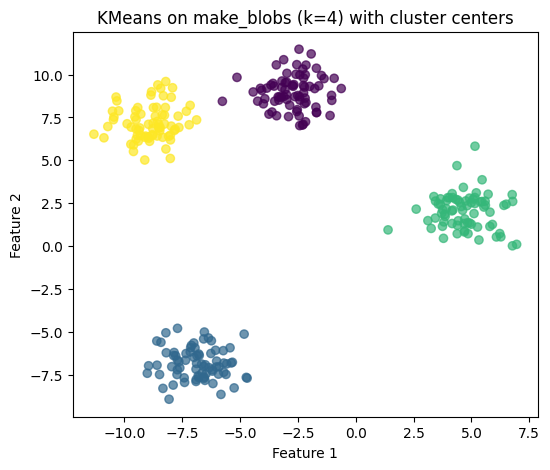

array([[-2.70981136,  8.97143336],
       [-6.83235205, -6.83045748],
       [ 4.7182049 ,  2.04179676],
       [-8.87357218,  7.17458342]])

In [1]:
# Q6: Generate blobs, run KMeans, and visualize with centers

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1) Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# 2) Fit KMeans
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# 3) Visualize
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, linewidths=2, facecolors="none")
plt.title("KMeans on make_blobs (k=4) with cluster centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Print centers for reference
centers


Q7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1) Load the wine dataset
wine = load_wine()
X = wine.data

# 2) Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Train DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)  # starting with a reasonable eps
labels = dbscan.fit_predict(X_scaled)

# 4) Count clusters (excluding noise which is labeled -1)
unique_labels = set(labels)
n_clusters = len([l for l in unique_labels if l != -1])

n_clusters


5

Q8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

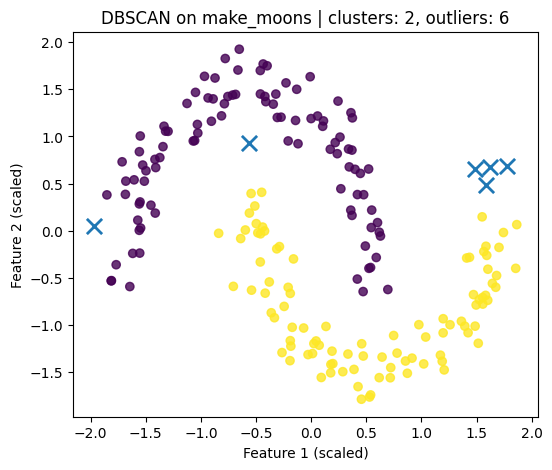

(2, 6)

In [3]:
# Generate moon-shaped data, cluster with DBSCAN, and highlight outliers
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1) Data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# 2) Scale
X_scaled = StandardScaler().fit_transform(X)

# 3) DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X_scaled)

# 4) Counts
n_clusters = len(set(labels) - {-1})
n_outliers = np.sum(labels == -1)

# 5) Plot: clusters and highlight outliers
plt.figure(figsize=(6,5))
# non-noise points
mask_core = labels != -1
plt.scatter(X_scaled[mask_core, 0], X_scaled[mask_core, 1], c=labels[mask_core], alpha=0.8)
# outliers
mask_noise = labels == -1
plt.scatter(X_scaled[mask_noise, 0], X_scaled[mask_noise, 1], marker='x', s=120, linewidths=2)
plt.title(f"DBSCAN on make_moons | clusters: {n_clusters}, outliers: {int(n_outliers)}")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

# Also print counts
(n_clusters, int(n_outliers))


Q9:  Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.

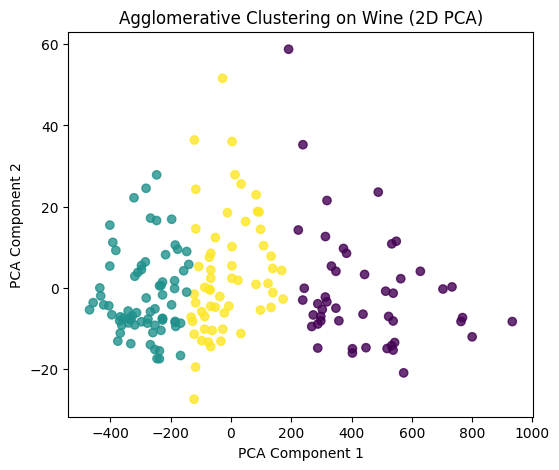

In [4]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

# 1) Load the wine dataset
wine = load_wine()
X = wine.data

# 2) Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X)

# 3) Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_2d)

# 4) Visualize
plt.figure(figsize=(6,5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', alpha=0.8)
plt.title("Agglomerative Clustering on Wine (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


Q10: You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories. Describe your real-world data science workflow using clustering:

 ● Which clustering algorithm(s) would you use and why?

 ● How would you preprocess the data (missing values, scaling)?

 ● How would you determine the number of clusters?

 ● How would the marketing team benefit from your clustering analysis?

Real-world clustering workflow (short):

Algorithm: Use K-Means for main segmentation (fast, scalable) and DBSCAN to detect outliers.

Preprocessing: Handle missing values (mean/median for numeric, mode/0 for categorical), one-hot encode categories, and scale features using StandardScaler so all contribute equally.

Find cluster count: Use Elbow Method and Silhouette Score to pick the best number of clusters.

Marketing benefit: Get clear customer groups for targeted offers, personalized recommendations, churn prevention, and better ad budget allocation.